In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [12]:
df= pd.read_csv("Dataset_626.csv")

In [13]:
column_means=df.mean()
cleanerdf=df.fillna(column_means)

# replacing null values with the attribute mean

In [14]:

xcolumns=["% Fair or Poor Health","60plus_pct","all_icu","hospitals_in_cost_reports","% Rural","% Female","% Not Proficient in English","% Non-Hispanic White","% Hispanic","Average Number of Physically Unhealthy Days","Average Number of Mentally Unhealthy Days","% Smokers","% Adults with Obesity","% Physically Inactive","% Excessive Drinking","% Uninsured","% Vaccinated","% Completed High School","% Some College","% Unemployed","% Children in Poverty","% Children in Single-Parent Households","Social Association Rate","% Severe Housing Problems","% Drive Alone to Work","% Frequent Physical Distress","% Frequent Mental Distress","% Adults with Diabetes","% Food Insecure","% Limited Access to Healthy Foods","% Insufficient Sleep","Median Household Income","% Enrolled in Free or Reduced Lunch","% Homeowners","Population","% Less Than 18 Years of Age","% 65 and Over","% Black","% American Indian & Alaska Native","% Asian","per_gop","People per square KM"]


# identifying the independant variables

In [15]:
x=cleanerdf.loc[:,xcolumns].values
y=df.loc[:,"deaths by county"].values


# identifying the dependant variable


In [22]:
x = StandardScaler().fit_transform(x)

# standarizing the data

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10'])


# creating 10 PCA variables

In [24]:
finalDf = pd.concat([principalDf, cleanerdf[["deaths by county"]]], axis = 1)

#combining the PCA variables with the dependant variable

In [25]:
pca.explained_variance_ratio_

array([0.30687603, 0.15590597, 0.07593954, 0.05935725, 0.04843535,
       0.04437711, 0.03526152, 0.02639901, 0.02516538, 0.02176982])

In [26]:
xcolumns=['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10']
y=finalDf["deaths by county"]

In [27]:
def get_stats():
    x=finalDf[xcolumns]
    results=sm.OLS(y,x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:       deaths by county   R-squared (uncentered):                   0.064
Model:                            OLS   Adj. R-squared (uncentered):              0.061
Method:                 Least Squares   F-statistic:                              21.50
Date:                Tue, 06 Jul 2021   Prob (F-statistic):                    3.06e-39
Time:                        01:09:31   Log-Likelihood:                          270.36
No. Observations:                3142   AIC:                                     -520.7
Df Residuals:                    3132   BIC:                                     -460.2
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x=finalDf[xcolumns]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
model=LinearRegression()
model.fit(x_train,y_train)

#creating the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

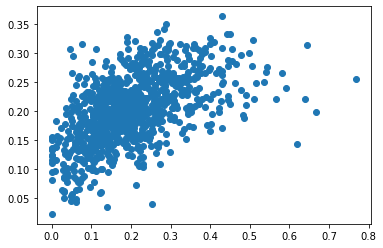

In [35]:
predictions = model.predict(x_test)
plt.scatter(y_test, predictions)

(array([  8.,  94., 288., 316., 156.,  49.,  20.,   8.,   1.,   3.]),
 array([-0.26099703, -0.18362007, -0.10624311, -0.02886615,  0.0485108 ,
         0.12588776,  0.20326472,  0.28064168,  0.35801864,  0.4353956 ,
         0.51277256]),
 <a list of 10 Patch objects>)

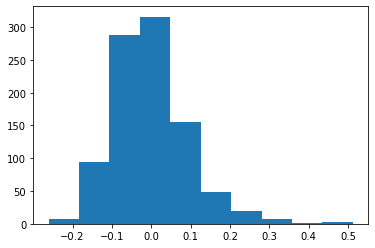

In [36]:
plt.hist(y_test - predictions)

In [37]:
from sklearn import metrics

In [32]:
from sklearn.metrics import r2_score

metrics.r2_score(y_test, predictions)

0.28642988464644326